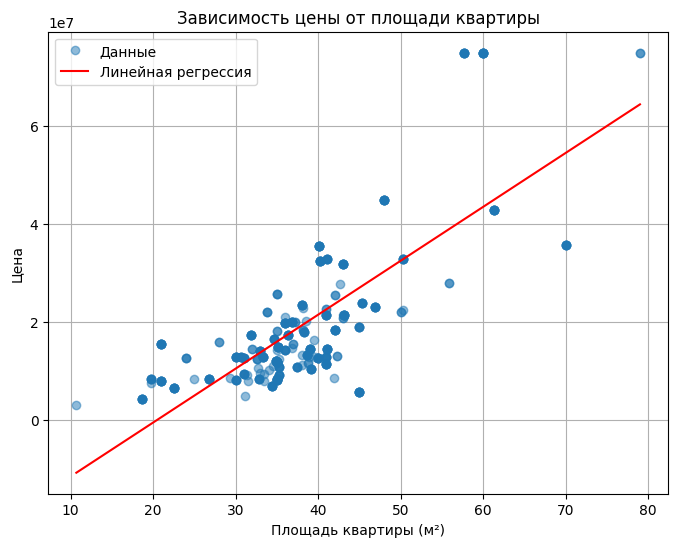

Обработка данных завершена. Файл сохранён: ../data/processed/train.csv


In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

# Путь к папке с сырыми данными
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv")

# Объединяем все CSV-файлы в один DataFrame
main_dataframe = pd.concat((pd.read_csv(f) for f in file_list), ignore_index=True)

# Очищаем названия столбцов от пробелов
main_dataframe.columns = main_dataframe.columns.str.strip()

# Проверяем наличие необходимых столбцов
required_cols = ['url', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price']
missing_cols = [col for col in required_cols if col not in main_dataframe.columns]
if missing_cols:
    raise KeyError(f"Отсутствуют необходимые столбцы: {missing_cols}")

# Переименование столбцов под параметры HTML-формы
rename_map = {
    'total_meters': 'area',
    'rooms_count': 'rooms',
    'floors_count': 'total_floors',
    'floor': 'floor'
}
main_dataframe = main_dataframe.rename(columns=rename_map)

# Создаём столбец url_id (например, для идентификации)
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2] if isinstance(x, str) else None)

# Приводим типы к нужным
main_dataframe['floor'] = main_dataframe['floor'].astype(int)
main_dataframe['total_floors'] = main_dataframe['total_floors'].astype(int)
main_dataframe['rooms'] = main_dataframe['rooms'].astype(int)

# Добавляем булевы признаки по количеству комнат
main_dataframe['rooms_1'] = main_dataframe['rooms'] == 1
main_dataframe['rooms_2'] = main_dataframe['rooms'] == 2
main_dataframe['rooms_3'] = main_dataframe['rooms'] == 3

# Добавляем булевы признаки для этажей
main_dataframe['first_floor'] = main_dataframe['floor'] == 1
main_dataframe['last_floor'] = main_dataframe['floor'] == main_dataframe['total_floors']

# Фильтруем данные по цене и площади
filtered_df = main_dataframe[
    (main_dataframe['price'] < 100_000_000) &
    (main_dataframe['area'] < 100)
]

# Визуализация зависимости цены от площади
x = filtered_df['area']
y = filtered_df['price']

plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', alpha=0.5, label='Данные')

# Линейная регрессия (прямая)
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, m * x_line + b, color='red', label='Линейная регрессия')

plt.xlabel('Площадь квартиры (м²)')
plt.ylabel('Цена')
plt.title('Зависимость цены от площади квартиры')
plt.legend()
plt.grid(True)
plt.show()

# Сохраняем обработанные данные
filtered_df.to_csv('../data/processed/train.csv', index=False)

print("Обработка данных завершена. Файл сохранён: ../data/processed/train.csv")
